In [1]:
from sklearn import datasets, manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [13]:
n_samples = 500
x, y = datasets.make_s_curve( n_samples=n_samples )

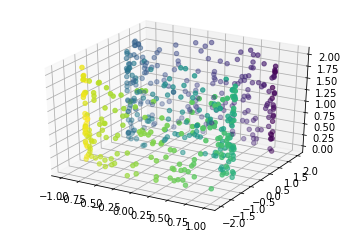

In [14]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

x_vals = x[:, 0]
z_vals = x[:, 1]
y_vals = x[:, 2]

ax.scatter( x_vals, y_vals, z_vals, c=y )
plt.show()

[]

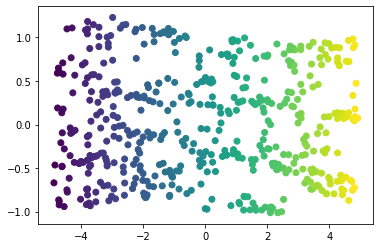

In [15]:
isomap = manifold.Isomap( n_neighbors=10, n_components=2 )
x_isomap = isomap.fit_transform( x )

x_vals = x_isomap[:, 0]
y_vals = x_isomap[:, 1]

plt.scatter( x_vals, y_vals, c=y )
plt.plot()

[]

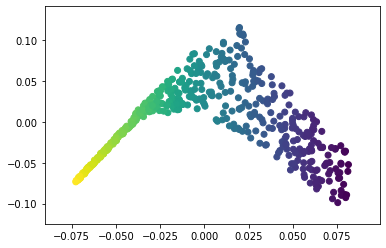

In [16]:
lle = manifold.LocallyLinearEmbedding( n_neighbors=10, n_components=2 )
x_lle = lle.fit_transform( x )

x_vals = x_lle[:, 0]
y_vals = x_lle[:, 1]

plt.scatter( x_vals, y_vals, c=y )
plt.plot()